# Иерархический кластерный анализ

### Econom_Cities_data

In [1]:
#  Активируем библиотеки

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import os

In [2]:
#  Активируем процедуру для стандартизации данных
from sklearn import preprocessing

#  Активируем 3 процедуры иерархического кластерного анализа
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
#  Задаем рабочую папку
os.chdir('/Users/kchendemer/Documents/analytics python/lab 1/')

In [4]:
# Считываем файл Econom_Cities_data, обозначаем колонку City индексом
df = pd.read_csv('Econom_Cities_data.csv', sep=';', index_col= 'City')

In [5]:
# Проверяем, что все прочиталось корректно
df.head()

,Work,Price,Salary
City,,,
Amsterdam,1714,"65,6",49
Athens,1792,"53,8","30,4"
Bogota,2152,"37,9","11,5"
Bombay,2052,"30,3","5,3"
Brussels,1708,"73,8","50,5"


In [6]:
# Проверяем, что все строки подгрузились
df.shape

(48, 3)

In [7]:
# Проверяем тип данных
df.dtypes

Work       int64
Price     object
Salary    object
dtype: object

In [8]:
# Меняем тип данных
df['Price'] = df['Price'].str.replace(',', '.').astype(float)
df['Salary'] = df['Salary'].str.replace(',', '.').astype(float)

In [9]:
# Проверям, что тип данных стал корректным
df.dtypes

Work        int64
Price     float64
Salary    float64
dtype: object

In [10]:
# Просматриваем данные
df

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5
Buenos_Aires,1971,56.1,12.5
Cairo,-9999,37.1,-9999.0
Caracas,2041,61.0,10.9
Chicago,1924,73.9,61.9


Данные сильно разбросаны и прежде чем использовать кластеризации необходимо их нормализировать

Формула нормализации данных: $z = (x - mean) / std$

In [11]:
# Выбираем вариант стандартизации
stand = preprocessing.StandardScaler()

# вычисляем параметры стандартизации (они сохраняются внутри объекта norm)
stand.fit(df)

# преобразуем данные - получаем матрицу класса numpy.ndarray
stand_matrix = stand.transform(df)

# Преобразуем её в датафрейм
df_stand = pd.DataFrame(stand_matrix, index=df.index, columns=df.columns)

In [12]:
df_stand

,Work,Price,Salary
City,,,
Amsterdam,0.138269,-0.151250,0.213212
Athens,0.171046,-0.698647,0.203941
Bogota,0.322325,-1.436242,0.194519
Bombay,0.280303,-1.788804,0.191429
Brussels,0.135748,0.229145,0.213960
Buenos_Aires,0.246266,-0.591951,0.195018
Cairo,-4.783750,-1.473354,-4.795489
Caracas,0.275681,-0.364642,0.194220
Chicago,0.226515,0.233784,0.219643


Далее используем `linkage` из `scipy.cluster.hierarchy` для построения иерархического кластерного анализа

Выбираем метод Варда, чтобы получить компактные кластеры, а значит расстояние будет Эвклидовым

In [13]:
link = linkage(df_stand, 'ward', 'euclidean')

In [14]:
#  Проверяем точно ли мы получили матрицу и ее размеры

print(type(link))
print(link.shape)

<class 'numpy.ndarray'>
(47, 4)


В объекте `link` хранится история объединения кластеров - это матрица numpy `(n-1) x 4`, где `n` - число наблюдений. <br>
Каждая строка матрицы описывает слияние очередной пары кластеров с номерами `link[i, 0]` и `link[i, 1]`. <br>
Новому кластеру присваивается номер `n + i`. <br>
Столбец `link[i, 2]` содержит расстояние между объединяемыми кластерами, а `link[i, 3]` - объем нового кластера.<br>

In [15]:
#  Посмотрим на содержимое link - только первые 15 строк матрицы
link[:15]

array([[2.80000000e+01, 3.50000000e+01, 2.25040715e-02, 2.00000000e+00],
       [4.00000000e+00, 1.20000000e+01, 4.09006083e-02, 2.00000000e+00],
       [1.10000000e+01, 4.60000000e+01, 4.35229017e-02, 2.00000000e+00],
       [2.40000000e+01, 4.10000000e+01, 4.52682803e-02, 2.00000000e+00],
       [3.20000000e+01, 3.70000000e+01, 4.89408315e-02, 2.00000000e+00],
       [2.00000000e+01, 3.60000000e+01, 5.34862404e-02, 2.00000000e+00],
       [1.80000000e+01, 2.70000000e+01, 6.09939864e-02, 2.00000000e+00],
       [8.00000000e+00, 2.90000000e+01, 6.90517526e-02, 2.00000000e+00],
       [1.60000000e+01, 4.50000000e+01, 8.76629248e-02, 2.00000000e+00],
       [3.40000000e+01, 5.40000000e+01, 9.31657165e-02, 3.00000000e+00],
       [1.40000000e+01, 3.30000000e+01, 9.49567062e-02, 2.00000000e+00],
       [2.20000000e+01, 3.10000000e+01, 9.62263004e-02, 2.00000000e+00],
       [5.00000000e+00, 2.10000000e+01, 9.63929653e-02, 2.00000000e+00],
       [3.00000000e+01, 5.30000000e+01, 1.00789692e

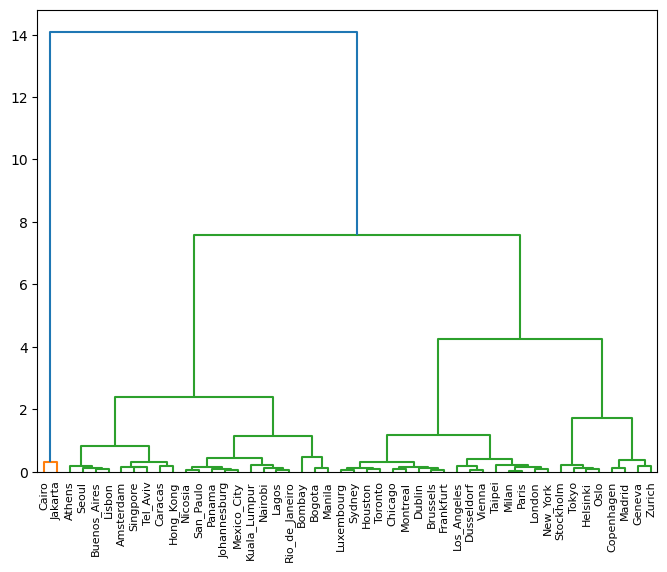

In [16]:
# Построим дендрограмму
# Пороговое значение определяется по формуле h = 0.7*max(link[:,2]).

fig = plt.figure(figsize=(8,6))
dn = dendrogram(link, labels= df.index.tolist())

Можно заметить, что **Cairo** и **Jakarta** являются выбросами - проверим их изначальные данные, чтобы убедиться

In [17]:
print(df.query('index in ("Cairo", "Jakarta")'))

         Work  Price  Salary
City                        
Cairo   -9999   37.1 -9999.0
Jakarta -9999   43.6 -9999.0


In [18]:
# Действительно данные сильно отличаются и образуют свой собсвтенный кластер - для нас это не информативно, 
# поэтому убираем эти данные

df_new = df.drop(["Cairo", "Jakarta"])

Теперь нормализируем уже датафрейм без индексов и строим с ним дендограмму

In [19]:
# Выбираем вариант стандартизации
stand1 = preprocessing.StandardScaler()

# вычисляем параметры стандартизации (они сохраняются внутри объекта norm)
stand1.fit(df_new)

# преобразуем данные - получаем матрицу класса numpy.ndarray
stand_matrix1 = stand1.transform(df_new)

# Преобразуем её в датафрейм
df_stand1 = pd.DataFrame(stand_matrix1, index=df_new.index, columns=df_new.columns)

In [20]:
link1 = linkage(df_stand1, 'ward', 'euclidean')

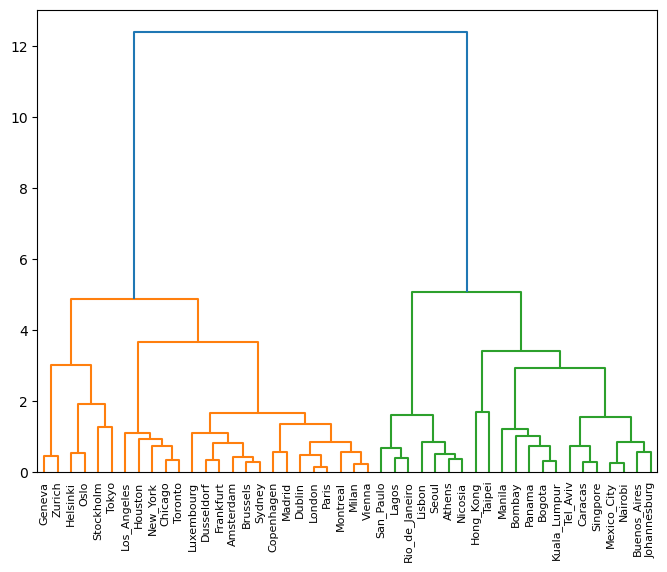

In [21]:
fig = plt.figure(figsize=(8,6))
dn = dendrogram(link1, labels= df_new.index.tolist())

**Каменистая осыпь**, она же локоть - график, помогающий определить число кластеров <br>
Будем использовать второй столбец матрицы `link1`, где хранятся расстояния между объединяемыми кластерами

In [22]:
dist = link1[:, 2]
dist

array([ 0.13000932,  0.20992596,  0.24101549,  0.26638013,  0.27962161,
        0.28619313,  0.31145704,  0.31305006,  0.3489377 ,  0.38756772,
        0.419298  ,  0.44645167,  0.45306282,  0.4905399 ,  0.50930475,
        0.54142314,  0.54694673,  0.55560294,  0.6525312 ,  0.70695573,
        0.71322146,  0.73106836,  0.80923253,  0.81996004,  0.83440954,
        0.83591396,  0.92010068,  1.00797757,  1.07317494,  1.09798639,
        1.18557963,  1.2661125 ,  1.34552527,  1.5346713 ,  1.60218207,
        1.65009621,  1.67120837,  1.9067302 ,  2.91093293,  2.99369803,
        3.40166518,  3.65965497,  4.85967779,  5.06109685, 12.40027153])

На графике **Каменистая осыпь** показывается зависимость расстояний между кластерами от шага объединения (обратного) <br>
На графике находим момент, начиная с которого расстояние перестанет значительно меняться

Text(0, 0.5, 'Расстояние')

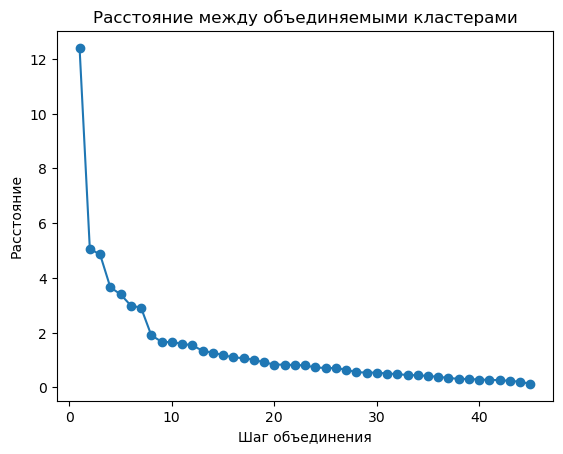

In [23]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

Из картинки видно, что если мы остановим объединение кластеров при расстоянии равном около 4.5, мы получим 4 кластера, а при равном 3.5 - 5 кластеров. 

#### Попробуем посмотреть ситуацию при 4 кластерах

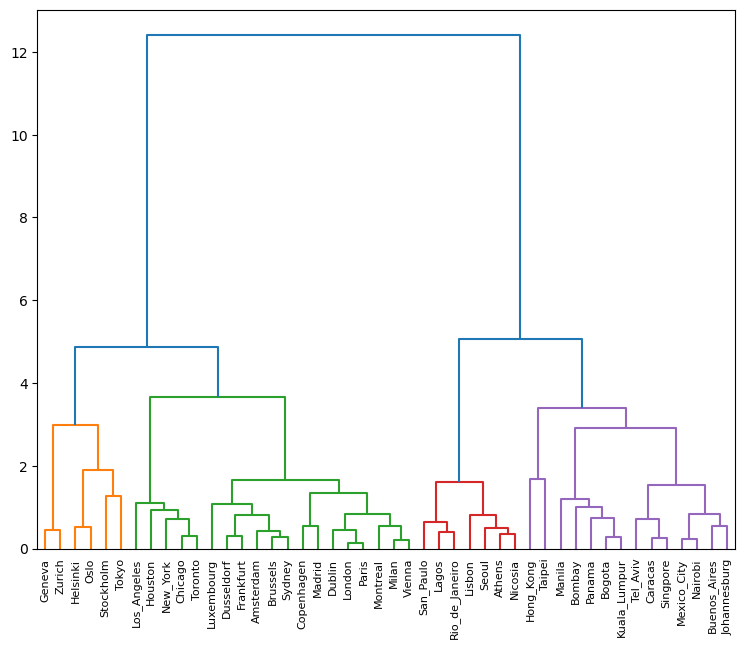

In [24]:
# Построим дендрограмму.
# Сами задаем порог для расстояния = 4.5, цветом выделяются 3 кластера

fig = plt.figure(figsize=(9,7))
dn = dendrogram(link1, color_threshold = 4.5, labels=df_new.index.tolist())

In [25]:
# Информация о кластерах добавляется в таблицу данных в виде столбца
# Останавливаем объединение, когда расстояние между кластерами превысит 4.5
df_new['cluster'] = fcluster(link1, 4.5, criterion='distance')

In [26]:
df_new.head()

,Work,Price,Salary,cluster
City,,,,
Amsterdam,1714,65.6,49.0,2
Athens,1792,53.8,30.4,3
Bogota,2152,37.9,11.5,4
Bombay,2052,30.3,5.3,4
Brussels,1708,73.8,50.5,2


In [27]:
#  Средние значения в каждом кластере
df_new.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
1,1780.500000,108.550000,71.300000
2,1792.000000,77.526316,55.157895
3,1798.857143,50.942857,19.214286
4,2082.357143,53.121429,14.914286


Стоит отметить, что в первых трех кластеров кол-во рабочих часов примерно одинаковое, а в четвертом самое больше. В то время как Price в 3 и 4 кластерах схожая, а самая высокая в первом. В случае зарплат похожая ситуация, как и в Price. 

**Итого получаем следующие кластеры:** <br>
1. Минимальное кол-во рабочих часов, но самые высокие зарплаты и цены
2. Кол-во рабочих часов все еще низкое, но уровень зарплаты и цен ниже.
3. Кол-во рабочих часов не сильно выше, но зарплаты сильно ниже, а цены самые низкие.
4. Большое кол-во рабоих часов, при этом зарплаты минимальные, а цены даже выше 3 кластера. 

#### Рассмотрим ситуацию при 5 кластерах

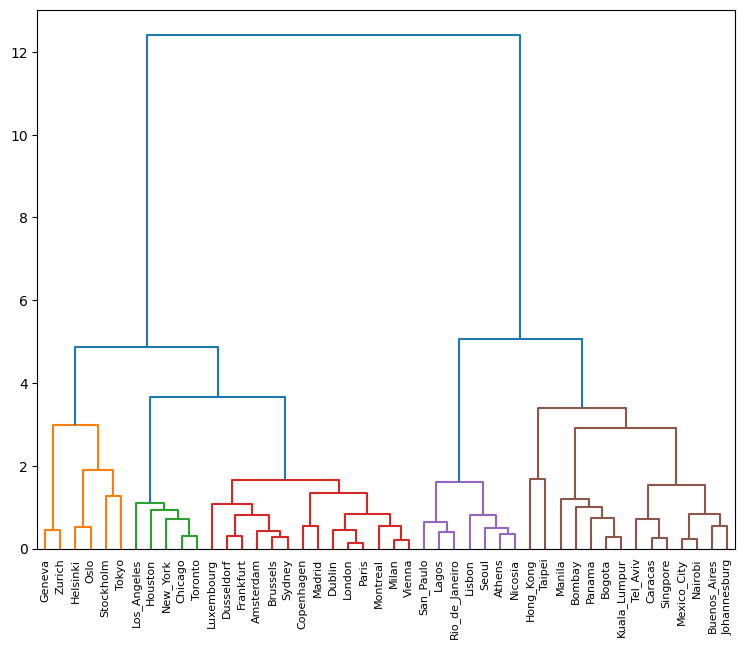

In [28]:
# Построим дендрограмму.
# Сами задаем порог для расстояния = 3.8

fig = plt.figure(figsize=(9,7))
dn = dendrogram(link1, color_threshold = 3.5, labels=df_new.index.tolist())

In [29]:
# Информация о кластерах добавляется в таблицу данных в виде столбца
# Останавливаем объединение, когда расстояние между кластерами превысит 4.5
df_new['cluster'] = fcluster(link1, 3.5, criterion='distance')

In [30]:
#  Средние значения в каждом кластере
df_new.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
1,1780.500000,108.550000,71.300000
2,1960.000000,75.820000,59.480000
3,1732.000000,78.135714,53.614286
4,1798.857143,50.942857,19.214286
5,2082.357143,53.121429,14.914286


Видим, что появился новый кластер, где большое кол-во рабочих часов, но при этом зарплаты выше среднего.<br> 

**Итого получаем следующие кластеры:** <br> 
1. Минимальное кол-во рабочих часов, но самые высокие зарплаты и цены
2. Кол-во часов гораздо выше, но зарплаты остаются на уровне выше среднего, как и цены. 
3. Кол-во рабочих часов все еще низкое, но уровень зарплаты и цен ниже.
4. Кол-во рабочих часов не сильно выше, но зарплаты сильно ниже, а цены самые низкие.
5. Большое кол-во рабоих часов, при этом зарплаты минимальные, а цены даже выше 3 кластера.

### Финальный выбор кол-ва кластеров будет исходить из изначально поставленной бизнес-задачи. 